In [34]:
import pickle
import pprint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
pp = pprint.PrettyPrinter(indent=4)

In [35]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 720x432 with 0 Axes>

In [36]:
# Grid objects from the grid search
with open('Data/pickles/result_dict', 'rb') as file:
    results = pickle.load(file)
# Contains test data
with open('Data/pickles/preproc_data', 'rb') as file:
    data = pickle.load(file)

y_true = data['y_test'].tolist()

In [37]:
# Metrics being used
from sklearn.metrics import accuracy_score, \
    confusion_matrix, \
    roc_curve, \
    roc_auc_score

In [38]:
def plot_confusion(y_pred, y_true):
    conf = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print()
    print(f'Accuracy: {acc}')
    sns.heatmap(conf,
                cmap='Blues',
                cbar=False,
                annot=True,
                fmt='g',
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'],
                annot_kws={"size": 20}
                )
    plt.show()

def plot_roc(models):
    for key, value in models.items():
        fpr, tpr, _ = roc_curve(value[0], value[1])
        sns.lineplot(x=fpr, y=tpr, label=key)

    ax = sns.lineplot(x=[0, 0.5, 1], y=[0, 0.5, 1])
    ax.lines[len(models)].set_linestyle("--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')

# Decision Tree

CV score: 0.6808053691275168
max_depth: 7
max_leaf_nodes: None
min_samples_leaf: 5

Accuracy: 0.6708004509582863


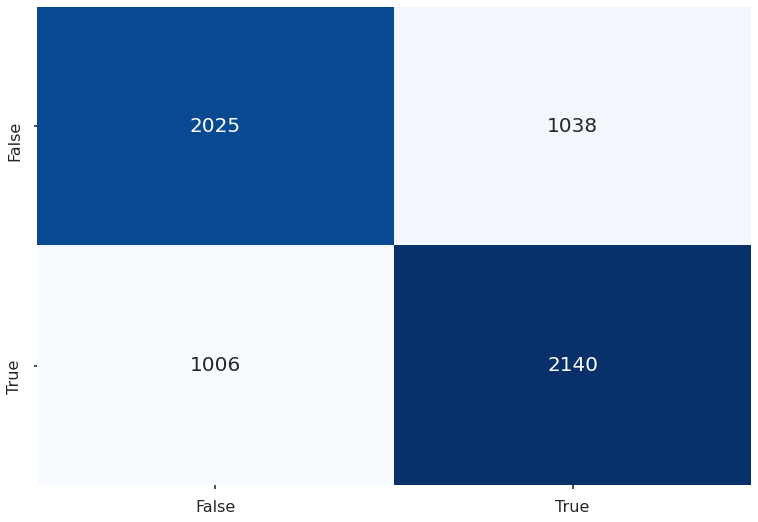

In [39]:
dec_tree = results['dec_tree'].best_estimator_
print(f'CV score: {results["dec_tree"].best_score_}')
for key, value in results["dec_tree"].best_params_.items():
    print(f'{key}: {value}')

y_pred = dec_tree.predict(data['x_test'])
dec = [y_true, y_pred]
plot_confusion(y_pred, data['y_test'])

* 67% is not that good, at least better than random
# Logisitc Regression

CV score: 0.647248322147651
C: 100
fit_intercept: True
n_jobs: -1
penalty: l2

Accuracy: 0.6537284586889999


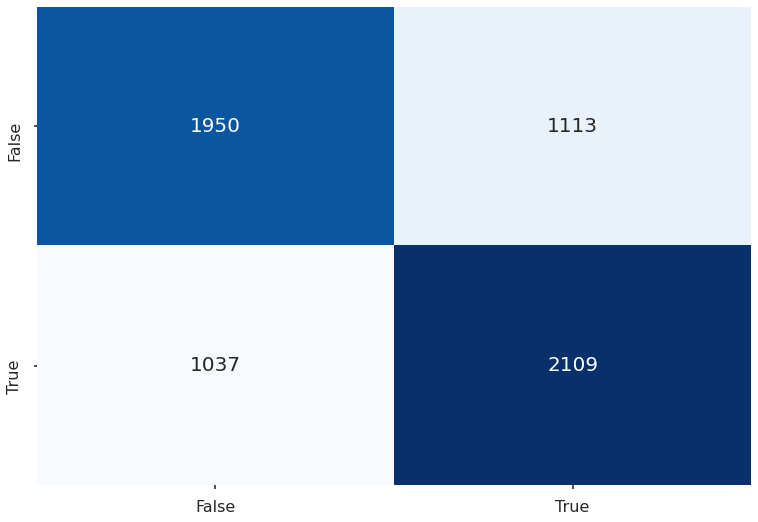

In [40]:
log_reg = results['log_reg'].best_estimator_
print(f'CV score: {results["log_reg"].best_score_}')
for key, value in results["log_reg"].best_params_.items():
    print(f'{key}: {value}')
y_pred = log_reg.predict(data['x_test'])
log = [y_true, y_pred]
plot_confusion(y_pred, y_true)

* Slightly worse than decision tree
# Random Forest

CV score: 0.6822013422818792
bootstrap: True
max_depth: 5
max_features: sqrt
min_samples_leaf: 4
min_samples_split: 2
n_estimators: 50
oob_score: True

Accuracy: 0.6659687550330166


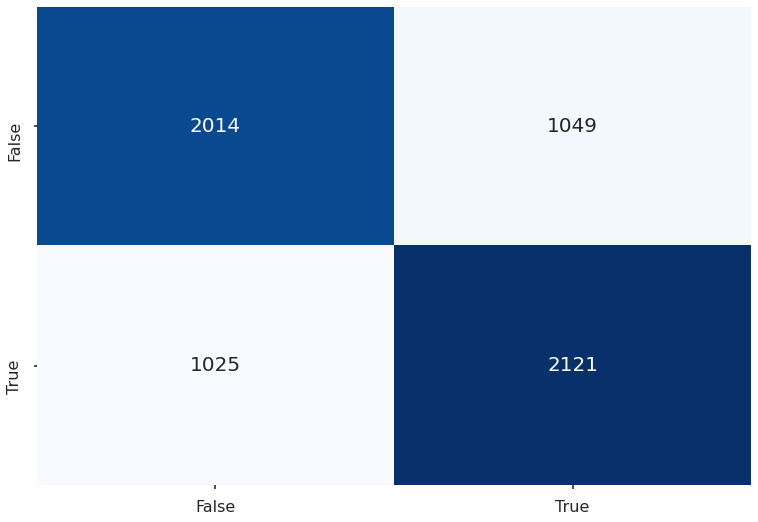

In [41]:
rf = results['rf'].best_estimator_
print(f'CV score: {results["rf"].best_score_}')
for key, value in results["rf"].best_params_.items():
    print(f'{key}: {value}')

y_pred = rf.predict(data['x_test'])
rand_f = [y_true, y_pred]
plot_confusion(y_pred, data['y_test'])

* False Positive precision did not improve much from Logistic Regression in comparison to the improvement with Decision Tree
# SVM

Best CV score: 0.6053154362416107
C: 100
degree: 1
kernel: poly

Accuracy: 0.588500563697858


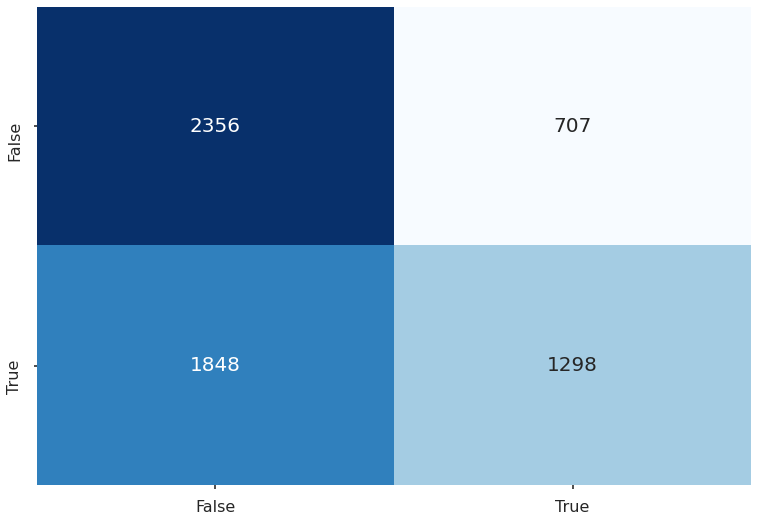

In [42]:
svm = results['svm'].best_estimator_
print(f'Best CV score: {results["svm"].best_score_}')
for key, value in results["svm"].best_params_.items():
    print(f'{key}: {value}')

y_pred = svm.predict(data['x_test'])
svc = [y_true, y_pred]
plot_confusion(y_pred, data['y_test'])

* Terrible!
* Seems to really like false positives

Best CV score: 0.7025503355704699
learning_rate: 0.5
max_depth: 3
n_estimators: 50
n_jobs: -1
reg_alpha: 1
reg_lambda: 1

Accuracy: 0.6856176517957803


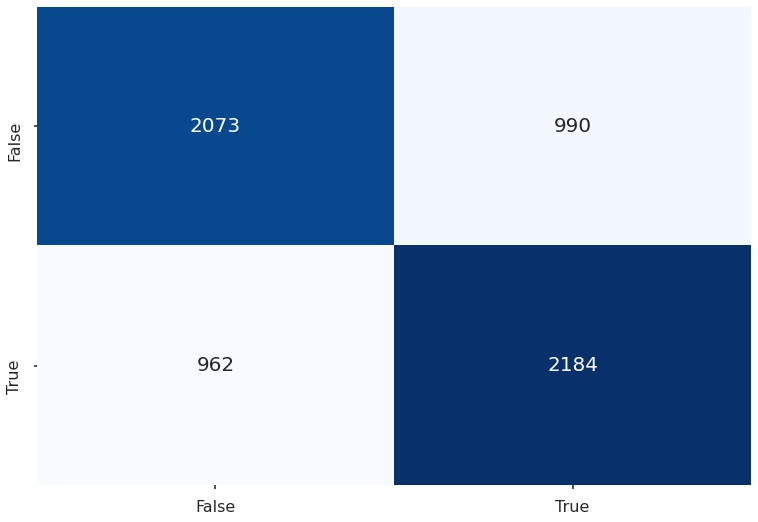

In [43]:
xgboost = results['xgboost'].best_estimator_
print(f'Best CV score: {results["xgboost"].best_score_}')
for key, value in results["xgboost"].best_params_.items():
    print(f'{key}: {value}')

y_pred = xgboost.predict(data['x_test'])
xgb = [y_true, y_pred]
plot_confusion(y_pred, data['y_test'])

* Slightly over-fits to train data set
# ROC

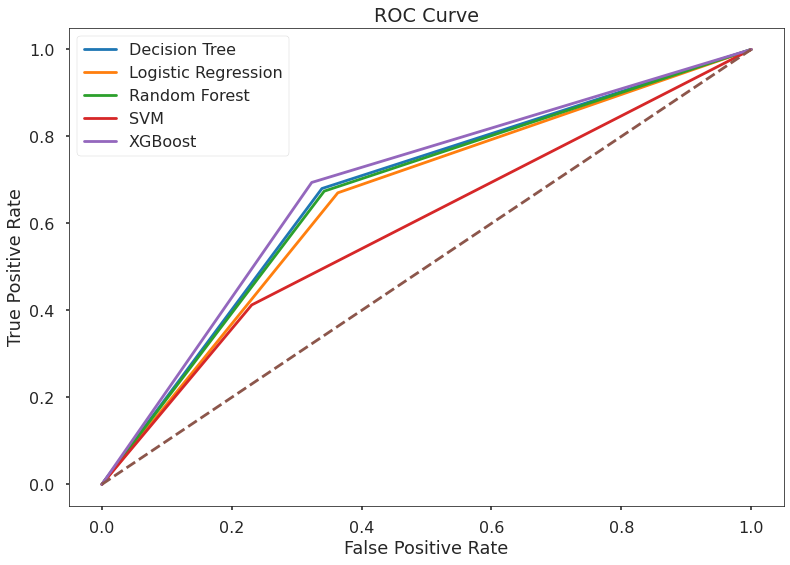

In [44]:
model_results = {
    'Decision Tree': dec,
    'Logistic Regression': log,
    'Random Forest': rand_f,
    'SVM': svc,
    'XGBoost': xgb
}
plot_roc(model_results)

# Conclusion
* XGBoost performs the best of the 5 models
* Interested in seeing accuracy of the models with more data since under-sampling removed a large portion of the data
* None of the models can reliably be used to predict fraudulent transactions